In [1]:
# =============================
# Step 1: Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# =============================
# Step 2: Load Data
# =============================
# Download Mall_Customers.csv or replace with your dataset
df = pd.read_csv("Mall_Customers.csv")

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      86
1           2  Female   56                  22                      57
2           3    Male   66                  41                      29
3           4    Male   69                  41                      78
4           5    Male   49                 112                      92


In [3]:
# =============================
# Step 3: Preprocessing
# =============================
# Drop ID
df = df.drop("CustomerID", axis=1)

# Encode Gender
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Male=1, Female=0

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(df)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

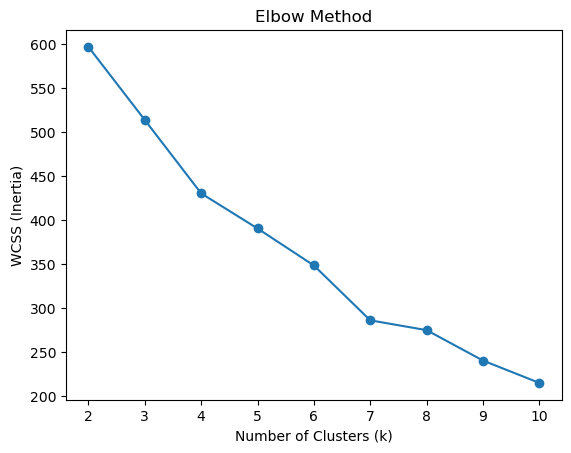

In [4]:
# =============================
# Step 4: Find Optimal K (Elbow)
# =============================
wcss = []
K_range = range(2,11)  # Try k from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()

In [5]:
# =============================
# Step 5: Apply KMeans with chosen k
# =============================
k = 5  # Suppose elbow shows 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df["Cluster"] = clusters

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# =============================
# Step 6: Evaluation
# =============================
sil = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil:.3f}")

# Cluster profiling
print(df.groupby("Cluster").mean())

Silhouette Score: 0.232
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.609756  31.902439           46.853659               28.682927
1        0.000000  41.228571           97.600000               75.400000
2        0.000000  52.868421           72.105263               27.131579
3        0.710526  60.578947           53.763158               73.447368
4        1.000000  37.895833          110.145833               54.229167


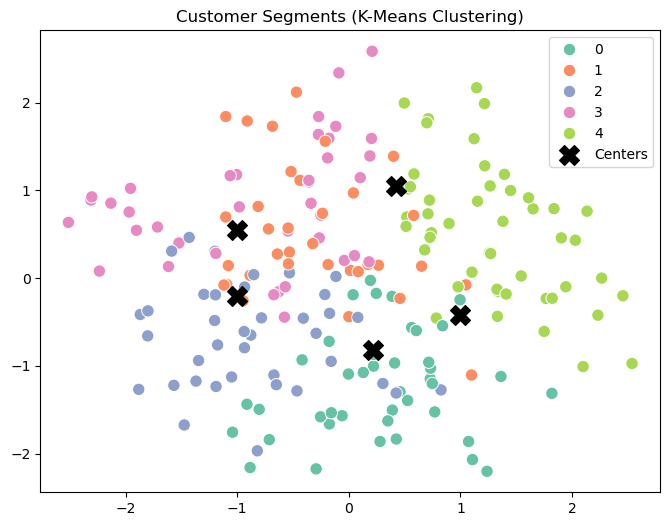

In [7]:
# =============================
# Step 7: Visualization
# =============================
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="black", marker="X", s=200, label="Centers")
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.show()